In [45]:
#os.listdir()

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import matplotlib.pyplot as plt

In [2]:
# load data

os.chdir('/Users/Joy/Desktop/Syracuse/Nexis')
air_review = pd.read_csv("reviews_2.csv") 
air_review.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,21456,29826,2010-03-16,88822,Katherine,We had a delightful stay at Dana's fantastical...
2,21456,30680,2010-03-21,94354,Constance,"Dana's place is charming, and very well-locate..."


In [3]:
calendar = pd.read_csv("calendar.csv")  # ==> obviously not gonna need calendar either
calendar.head(3)

,listing_id,date,available,price
0,2515,2019-12-02,t,$89.00
1,21456,2019-12-05,t,$148.00
2,21456,2019-12-04,t,$148.00


In [9]:
price_list = []
for i in top10_listing_list:
    x = calendar[calendar['listing_id'] == i]

print(x)

NameError: name 'top10_listing_list' is not defined

In [10]:
price_list = []
for i in top10_listing_list:
    x = calendar[calendar['listing_id'] == i]['price']
    price_list.append(x)
        
comment_list = []
for i in top10_listing_list:
    x = final_reivew_NNA[final_reivew_NNA['listing_id'] == i]['comments']
    x_join = " ".join(com for com in x)
    comment_list.append(x_join)

len(comment_list)
# all the comments top 10 listings


NameError: name 'top10_listing_list' is not defined

In [165]:
#air_review_1 = pd.read_csv("reviews.csv") # obviously I do not need reviews.csv
#air_review_1.head(3)

,listing_id,date
0,2515,2008-10-13
1,21456,2010-03-16
2,21456,2010-03-21


In [11]:
listing = pd.read_csv("listings 2.csv")
listing.head(1)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.42


In [12]:
price_df = listing[['id','price']]

In [13]:
top10_listing_list

NameError: name 'top10_listing_list' is not defined

In [ ]:
price_df[price_df['id'] == '10101135']

In [14]:
l =[]
for i in top10_listing_list:
    x = price_df[price_df['id'] == i]
    l.append(x)

print(x)

NameError: name 'top10_listing_list' is not defined

In [15]:
col = listing.columns.tolist()
type(col)
id_col = [col for col in listing.columns if 'id' in col]
id_col # id in the listing dataframe is the listing_id

['id', 'scrape_id', 'host_id', 'host_identity_verified']

In [16]:
review_col = [col for col in listing.columns if 'review' in col]
review_col.insert(0,'id')
review_col

['id',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [17]:
listing_sub = listing[review_col]
# delete ones without reviews - to save memory???

listing_sub = listing_sub[listing_sub.number_of_reviews != 0]

listing_sub.head(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2515,175,2008-10-13,2018-11-18,93.0,9.0,9.0,10.0,9.0,9.0,9.0,1.42
1,21456,76,2010-03-16,2018-10-16,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.72
2,2539,9,2015-12-04,2018-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.25
3,2595,41,2009-11-21,2018-12-02,95.0,9.0,9.0,10.0,10.0,10.0,9.0,0.37
4,21644,1,2018-10-09,2018-10-09,100.0,10.0,10.0,10.0,10.0,10.0,8.0,0.51
5,3330,38,2010-01-04,2018-11-12,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.35
6,21794,26,2010-05-16,2018-10-01,99.0,10.0,10.0,10.0,10.0,10.0,10.0,0.25
8,22911,140,2010-03-28,2018-10-28,92.0,9.0,9.0,10.0,10.0,8.0,9.0,1.32
9,22918,10,2018-06-25,2018-11-12,82.0,9.0,8.0,9.0,10.0,9.0,8.0,1.82
10,3831,221,2014-09-30,2018-11-30,90.0,9.0,9.0,10.0,10.0,9.0,9.0,4.34


In [18]:
# delete ones without any reviews
print('Originally, we have',len(listing_sub), 'rows in the dataset') #there are 38866 listings
len(listing_sub[listing_sub['number_of_reviews'].isnull()])
listing_sub_NNA = listing_sub[listing_sub['number_of_reviews'].notnull()]

len(listing_sub_NNA) # there are no NAs in number of reviews
listing_sub_NNA = listing_sub[listing_sub['review_scores_rating'].notnull()]

print('After eliminate NAs in the rating and review, we have',len(listing_sub_NNA),'rows')

Originally, we have 38866 rows in the dataset
After eliminate NAs in the rating and review, we have 37746 rows


In [19]:
listing_sub_NNA['first_review'] = pd.to_datetime(listing_sub_NNA['first_review'], errors='coerce')
listing_sub_NNA['last_review'] = pd.to_datetime(listing_sub_NNA['last_review'], errors='coerce')
listing_sub_NNA.dtypes # make sure they are datetime type

listing_sub_NNA['Duration_m']= (listing_sub_NNA['last_review'] - listing_sub_NNA['first_review'])/np.timedelta64(1,'M')
listing_sub_NNA.loc[listing_sub_NNA['first_review'] == listing_sub_NNA['last_review'], 'Duration_m'] = 1
listing_sub_NNA.loc[listing_sub_NNA['Duration_m'] <1, 'Duration_m'] = 1

listing_sub_NNA['Avg_review_byMon']= listing_sub_NNA['number_of_reviews'] / listing_sub_NNA['Duration_m']
listing_sub_NNA['Avg_review_byMon']= listing_sub_NNA['number_of_reviews'] / listing_sub_NNA['Duration_m']

listing_sub_NNA.head(2)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Duration_m,Avg_review_byMon
0,2515,175,2008-10-13,2018-11-18,93.0,9.0,9.0,10.0,9.0,9.0,9.0,1.42,121.168813,1.444266
1,21456,76,2010-03-16,2018-10-16,94.0,10.0,9.0,10.0,10.0,10.0,10.0,0.72,103.032916,0.737628


In [20]:
top_by_rev = listing_sub_NNA.sort_values('number_of_reviews', ascending = False).head(200)
top_by_rat = listing_sub_NNA.sort_values('review_scores_rating', ascending = False).head(150)
top_by_avg_rev = listing_sub_NNA.sort_values('reviews_per_month', ascending = False).head(200)
bot_by_avg_rev = listing_sub_NNA[(listing_sub_NNA['reviews_per_month'] >= 5) & (listing_sub_NNA['review_scores_rating'] <=85)]
#.sort_values('reviews_per_month', ascending = True).head(200)
print('On average, each listing has',listing_sub_NNA['number_of_reviews'].sum() / len(listing_sub), 'listings')

print('Average rating for top 200 avg-monthly-review listings',top_by_avg_rev['review_scores_rating'].mean()) #based on number of avg monthly review
print('Average rating for top 200 most-review listings',top_by_rev['review_scores_rating'].mean()) #based on number of reviews
print('Average rating for 150 top-rating listings',top_by_rat['review_scores_rating'].mean()) #based on number of reviews

print('\nTotal number of reviews for 200 Bottom avg-monthly-review listings',bot_by_avg_rev['number_of_reviews'].sum()) #based on number of avg monthly review
print('Total number of reviews for 200 top avg-monthly-review listings',top_by_avg_rev['number_of_reviews'].sum()) #based on number of avg monthly review
print('Total number of reviews for 200 top most-review listings',top_by_rev['number_of_reviews'].sum()) #based on number of reviews
print('Total number of reviews for 150 top-rating listings',top_by_rat['number_of_reviews'].sum()) #based on number of reviews


#listing_sub_NNA.sort_values('number_of_reviews', ascending = False)
#listing_sub_NNA.sort_values('Avg_review_byMon', ascending = False)
bot_by_avg_rev

On average, each listing has 27.93024751711007 listings
Average rating for top 200 avg-monthly-review listings 95.655
Average rating for top 200 most-review listings 93.59
Average rating for 150 top-rating listings 100.0

Total number of reviews for 200 Bottom avg-monthly-review listings 2457
Total number of reviews for 200 top avg-monthly-review listings 20721
Total number of reviews for 200 top most-review listings 62556
Total number of reviews for 150 top-rating listings 796


,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Duration_m,Avg_review_byMon
9569,6545163,218,2015-05-30,2018-11-18,82.0,9.0,8.0,9.0,9.0,10.0,9.0,5.08,41.659993,5.232838
10335,7036474,202,2015-10-22,2018-11-15,82.0,9.0,8.0,9.0,9.0,8.0,9.0,5.31,36.797470,5.489508
12296,8473327,208,2015-09-22,2018-11-16,85.0,9.0,8.0,9.0,9.0,9.0,9.0,5.32,37.815972,5.500321
16803,11824236,214,2016-03-31,2018-12-01,85.0,9.0,8.0,9.0,9.0,9.0,8.0,6.54,32.033512,6.680504
21514,14988596,70,2017-12-17,2018-11-18,84.0,8.0,8.0,9.0,9.0,10.0,8.0,5.92,11.039241,6.341016
26271,18471203,113,2017-04-30,2018-11-16,85.0,9.0,9.0,10.0,9.0,9.0,9.0,5.78,18.563010,6.087375
26282,18471944,99,2017-05-01,2018-11-21,83.0,9.0,9.0,9.0,9.0,9.0,9.0,5.08,18.694429,5.295695
27626,19248947,95,2017-06-14,2018-11-17,85.0,9.0,8.0,10.0,9.0,10.0,9.0,5.27,17.117395,5.549910
28031,19565076,109,2017-07-10,2018-12-02,83.0,9.0,9.0,10.0,10.0,10.0,9.0,6.35,16.755991,6.505136
29611,20436117,82,2017-09-02,2018-11-08,83.0,9.0,8.0,9.0,9.0,9.0,8.0,5.34,14.193310,5.777370


In [21]:
no_review = (listing_sub_NNA.loc[listing_sub_NNA['first_review'] == listing_sub_NNA['last_review']])
listing_sub_rev1 = (listing_sub_NNA.loc[listing_sub_NNA['first_review'] != listing_sub_NNA['last_review']])
listing_sub_rev1.sort_values('number_of_reviews', ascending=False)

print('Number of listings that have over avg num reviews: ',len(listing_sub_rev1[listing_sub_rev1['number_of_reviews']>28]))

listing_sub_rev2 = listing_sub_rev1[listing_sub_rev1['number_of_reviews']>28]
listing_sub_rev2['review_scores_rating'].mean()
listing_sub_rev2['review_scores_rating'].quantile([0.3,0.7])


Number of listings that have over avg num reviews:  10792


0.3    93.0
0.7    97.0
Name: review_scores_rating, dtype: float64

In [22]:
listing_sub[listing_sub['id'] == 903972] # this tells there is only 1 listing_id 

print('Average number of reviews: ',listing_sub_NNA['number_of_reviews'].mean())
print('Average reviews score rating: ',listing_sub_NNA['review_scores_rating'].mean())
print('Average monthly reviews: ',listing_sub_NNA['reviews_per_month'].mean())

print('Number of review \n',listing_sub_NNA['number_of_reviews'].quantile([0.3,0.7]))
print('review_scores_rating \n',listing_sub_NNA['review_scores_rating'].quantile([0.3,0.7]))
print('reviews_per_month \n',listing_sub_NNA['reviews_per_month'].quantile([0.3,0.7]))

# so I want to get ones with

Average number of reviews:  28.758994330525088
Average reviews score rating:  93.88202723467387
Average monthly reviews:  1.4667408467122713
Number of review 
 0.3     4.0
0.7    26.0
Name: number_of_reviews, dtype: float64
review_scores_rating 
 0.3    93.0
0.7    99.0
Name: review_scores_rating, dtype: float64
reviews_per_month 
 0.3    0.30
0.7    1.84
Name: reviews_per_month, dtype: float64


In [23]:
top_by_avg_rev.describe()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Duration_m,Avg_review_byMon
count,2.000000e+02,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.330885e+07,103.605000,95.655000,9.83000,9.655000,9.88000,9.920000,9.555000,9.665000,10.214750,9.380304,10.944616
std,6.113423e+06,113.792322,3.731702,0.41468,0.614707,0.35529,0.289862,0.508199,0.493958,2.042343,9.804604,2.226586
min,3.731827e+06,9.000000,76.000000,8.00000,6.000000,8.00000,8.000000,8.000000,8.000000,8.180000,1.000000,8.378690
25%,2.093290e+07,25.000000,94.000000,10.00000,9.000000,10.00000,10.000000,9.000000,9.000000,8.710000,2.332697,9.307616
50%,2.515729e+07,55.000000,96.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,9.655000,5.470338,10.312787
75%,2.805653e+07,141.250000,98.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.970000,12.796977,11.841012
max,2.990390e+07,547.000000,100.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,20.330000,42.481365,20.780506


In [24]:
print(top_by_avg_rev['review_scores_rating'].quantile([0.3,0.5,0.75]))


0.30    95.0
0.50    96.0
0.75    98.0
Name: review_scores_rating, dtype: float64


In [25]:
print('Total number of reviews:',top_by_avg_rev['number_of_reviews'].sum())

Total number of reviews: 20721


In [26]:
high = top_by_avg_rev[top_by_avg_rev['review_scores_rating'] >= 98]
low = top_by_avg_rev[top_by_avg_rev['review_scores_rating'] <= 95]
mid = top_by_avg_rev[top_by_avg_rev['review_scores_rating'] >95]
mid2 = mid[mid['review_scores_rating'] <98]
low2 = bot_by_avg_rev
print(len(high),high['number_of_reviews'].sum())
print(len(low),low['number_of_reviews'].sum())
#print(len(mid),mid['number_of_reviews'].sum())
print(len(mid2),mid2['number_of_reviews'].sum())
print(len(low2),low2['number_of_reviews'].sum())


64 5756
78 8746
58 6219
42 2457


In [27]:
high_id_list = high['id'].tolist()

In [28]:
low2 = bot_by_avg_rev[bot_by_avg_rev['review_scores_rating']<=84]
low2['label'] = 'low2'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
high.loc['label'] = 'high'
mid2.loc['label'] = 'mid'
low.loc['label'] = 'low'


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
air_list = pd.concat([low, high,mid2, low2], ignore_index=True)
air_list.columns
air_list.rename(index=str, columns={"id":"listing_id"}, inplace = True)

In [35]:
air_list.groupby('listing_id').mean().sort_values('number_of_reviews',ascending=False).head(10)

DataError: No numeric types to aggregate

In [36]:
air_list.shape

(233, 15)

In [37]:
top_by_avg_rev.describe()

,id,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Duration_m,Avg_review_byMon
count,2.000000e+02,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.330885e+07,103.605000,95.655000,9.83000,9.655000,9.88000,9.920000,9.555000,9.665000,10.214750,9.380304,10.944616
std,6.113423e+06,113.792322,3.731702,0.41468,0.614707,0.35529,0.289862,0.508199,0.493958,2.042343,9.804604,2.226586
min,3.731827e+06,9.000000,76.000000,8.00000,6.000000,8.00000,8.000000,8.000000,8.000000,8.180000,1.000000,8.378690
25%,2.093290e+07,25.000000,94.000000,10.00000,9.000000,10.00000,10.000000,9.000000,9.000000,8.710000,2.332697,9.307616
50%,2.515729e+07,55.000000,96.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,9.655000,5.470338,10.312787
75%,2.805653e+07,141.250000,98.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.970000,12.796977,11.841012
max,2.990390e+07,547.000000,100.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,20.330000,42.481365,20.780506


In [38]:
air_review.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [39]:
review = air_review[['listing_id','comments']]
review.shape
review.columns

Index(['listing_id', 'comments'], dtype='object')

In [40]:
air_list.columns

Index(['listing_id', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'Duration_m',
       'Avg_review_byMon', 'label'],
      dtype='object')

In [41]:
final_reivew = pd.merge(air_list,review, how='inner', on='listing_id')
final_reivew.shape

(22316, 16)

In [42]:
top200 = top_by_avg_rev['id'].tolist()

In [43]:
final_rev2 = pd.merge(top_by_avg_rev,review, how='inner', on='listing_id')
top_by_avg_rev

KeyError: 'listing_id'

In [ ]:
top10_listing['number_of_reviews'].sum()

In [50]:
top10_listing = final_reivew.groupby('listing_id').mean().sort_values('number_of_reviews',ascending=False).head(10)
top10_listing.reset_index(level=0, inplace=True)

top10_listing_list = top10_listing.listing_id.tolist()


In [164]:
final_reivew.columns

Index(['listing_id', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'Duration_m',
       'Avg_review_byMon', 'label', 'comments'],
      dtype='object')

In [134]:
air_review.shape
# checking the size of the dataframe

(1086800, 6)

In [14]:
air_review.groupby('listing_id').count().nlargest(5,'id')
# we can see the most popular listings and dive into their reviews

,id,date,reviewer_id,reviewer_name,comments
listing_id,,,,,
903972,571,571,571,571,569
903947,563,563,563,563,560
891117,557,557,557,557,557
9145202,547,547,547,547,547
10101135,493,493,493,493,491


In [7]:
# look for the most popular listings first and analyze the reviews
top_5_review = air_review[(air_review['listing_id']==903972) | (air_review['listing_id']==903947)\
                    | (air_review['listing_id']==891117)| (air_review['listing_id']==9145202)\
                   | (air_review['listing_id']==10101135)]

top_5_review.shape # so we will be working on 2731 reviews from the 5 most popular listings

(2731, 6)

In [8]:
air_review.groupby('reviewer_id').count().nlargest(5,'id')

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
86126627,62,62,62,62,62
15355355,61,61,61,61,61
17387960,61,61,61,61,61
39274139,59,59,59,59,59
563572,58,58,58,58,58


In [9]:
top_5_review.groupby('reviewer_id').count().nlargest(5,'id')

,listing_id,id,date,reviewer_name,comments
reviewer_id,,,,,
3973614,53,53,53,53,52
38293679,14,14,14,14,14
16609485,9,9,9,9,9
23198436,8,8,8,8,8
19443285,7,7,7,7,7


In [58]:
fst_listing = final_reivew[final_reivew['listing_id'] == 9145202]['comments'].tolist()

In [407]:
s_listing = final_reivew[final_reivew['listing_id'] == 10101135]['comments'].tolist()
t_listing = final_reivew[final_reivew['listing_id'] == 8168619]['comments'].tolist()
f_listing = final_reivew[final_reivew['listing_id'] == 7670562]['comments'].tolist()
fif_listing = final_reivew[final_reivew['listing_id'] == 6157276]['comments'].tolist()
six_listing = final_reivew_NNA[final_reivew_NNA['listing_id'] == 7675781]['comments'].tolist()
sev_listing = final_reivew[final_reivew['listing_id'] == 10186192]['comments'].tolist()
eig_listing = final_reivew[final_reivew['listing_id'] == 7125107]['comments'].tolist()

In [369]:
len(eig_listing)
len(sev_listing)

400

In [117]:
# this is the list of top 10 listing_id
# top10_listing_list

[9145202,
 10101135,
 8168619,
 7670562,
 6157276,
 7675781,
 10186192,
 7125107,
 16276632,
 6422875]

In [126]:
len(final_reivew[final_reivew['listing_id'] == 9145202]['comments'])#.tolist()#

547

In [141]:
print(len(final_reivew[final_reivew['comments'].notnull()]))
print(len(final_reivew))

22274
22316


In [142]:
final_reivew_NNA = final_reivew[final_reivew['comments'].notnull()]
final_reivew_NNA.isnull().values.any()

False

In [144]:
comment_list = []
for i in top10_listing_list:
    x = final_reivew_NNA[final_reivew_NNA['listing_id'] == i]['comments']
    x_join = " ".join(com for com in x)
    comment_list.append(x_join)

len(comment_list)
# all the comments top 10 listings

10

In [376]:
comment_list = []
for i in top200:
    x = final_reivew_NNA[final_reivew_NNA['listing_id'] == i]['comments']
    x_join = " ".join(com for com in x)
    comment_list.append(x_join)

len(comment_list)


200

In [378]:
#comment_list

In [379]:
type(comment_list)
#comment_join = " ".join(com for com in comment_list)
#type(comment_join)

list

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
# look for whoever gives the most reviews
t1_review = air_review[(air_review['listing_id']==903972)]
t2_review = air_review[(air_review['listing_id']==903947)]
t3_review = air_review[(air_review['listing_id']==891117)]
t4_review = air_review[(air_review['listing_id']==9145202)]
t5_review = air_review[(air_review['listing_id']==10101135)]

print(t1_review.shape)
print(t2_review.shape)
print(t3_review.shape)
print(t4_review.shape)
print(t5_review.shape)

(571, 6)
(563, 6)
(557, 6)
(547, 6)
(493, 6)


In [11]:
type(top_5_review)
t1_rev_list = t1_review["comments"].tolist()
t2_rev_list = t2_review["comments"].tolist()
t3_rev_list = t3_review["comments"].tolist()
t4_rev_list = t4_review["comments"].tolist()
t5_rev_list = t5_review["comments"].tolist()

type(t1_rev_list)

list

In [44]:
rev_h = final_reivew[final_reivew['label']=='high']
rev_l = final_reivew[final_reivew['label']=='low']
rev_m = final_reivew[final_reivew['label']=='mid']
rev_l2 = final_reivew[final_reivew['label']=='low2']


In [45]:
rev_l2.head(2)

,listing_id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Duration_m,Avg_review_byMon,label,comments
5972,29872652,9,2018-11-09 00:00:00,2018-12-03 00:00:00,80,8,8,10,10,10,9,9,1,9,low2,The host canceled this reservation 13 days bef...
5973,29872652,9,2018-11-09 00:00:00,2018-12-03 00:00:00,80,8,8,10,10,10,9,9,1,9,low2,The location and the communication with the ho...


In [83]:
stop_words = set(stopwords.words('english'))   
#word_tokens = word_tokenize(example_sent) 
#stop_words
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [93]:
# Start with one review:
t1_com = t1_review['comments'].iloc[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(t1_com)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 't1_review' is not defined

In [40]:
t1_com = t1_review['comments'].iloc[0]
t1_com

'Joe is a great host. The apartment was clean. The building is close to the 145 stop of the 3. There are a number of grocery stores, gas stations, and coffee shops (dd & s-bucks), pharmacies, and convenience stores in the vicinity. The NYSC on 145 & Fred. Douglas is a good place to work out. The neighborhood looks rough on first site, but the people are all very kind and I felt safe there. The stairwell to the building is rather filthy and smells, but the apartment is very clean with comfy beds. Would definitely stay here again. This was a great experience.\n'

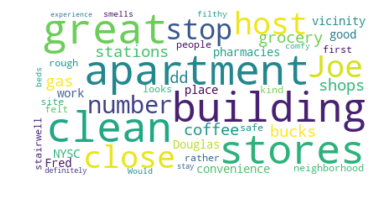

In [47]:

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(t1_com)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [49]:
t1_review['comments'].isnull().values.any()
# returns if there is any NaN values

True

In [53]:
t1_review['comments'].isnull().sum()

#This returns an integer of the total number of NaN values

2

In [56]:
t1_review_NNA = t1_review[t1_review['comments'].notnull()]
t1_review_NNA.isnull().values.any()

False

In [67]:
# remove null and combine all reviews
fst_list = " ".join(com for com in fst_listing)
type(fst_list)
fst_list[:300] # this is a big string

"Dona's place was absolutely fantastic. Her house is 5 minutes away from JFK airport, which was prefect for me because I had an early flight. The room was very clean and extremely comfortable. Dona was very welcoming and waited for me until I arrive very late from the airport. She give me a quick tou"

In [115]:
len(comment_list)
len(fst_listing)

547

In [381]:
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
nltk_stopwords.update(["joe", "us", "get", "also", "city","de","nyc","jfk","dona","'s",
                      "maya", "donna","go","la", "really","benjamin","sandi","angela",
                      "thanks","airbnb","thans", "frankie","muy","para","ben","ricardo",
                      "etc","danielle","thank"])

In [380]:
# let's look at bi-gram
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

all_lower = [tok.lower() for i in comment_list for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
textbigrams = list(nltk.bigrams(all_lower))
print(len(textbigrams))
finder = BigramCollocationFinder.from_words(all_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
all_bigram = finder.score_ngrams(bigram_measures.raw_freq)
print(len(all_bigram))
all_bigram[:50]

839861
51467


[(('great', 'place'), 0.0017931517320702688),
 (('would', 'definitely'), 0.001296641591118541),
 (('great', 'location'), 0.0012502053908856456),
 (('highly', 'recommend'), 0.0011359008980046722),
 (('great', 'host'), 0.0011311382108012984),
 (('definitely', 'stay'), 0.0008799064608233257),
 (('new', 'york'), 0.0008298982451879),
 (('great', 'stay'), 0.0007822713731541611),
 (('definitely', 'recommend'), 0.0007632206243406655),
 (('would', 'recommend'), 0.0006108146338327011),
 (('would', 'stay'), 0.0005584250745955884),
 (('nice', 'place'), 0.000507226187159319),
 (('one', 'night'), 0.000507226187159319),
 (('walking', 'distance'), 0.00048698476654498),
 (('super', 'clean'), 0.00045007394071883237),
 (('come', 'back'), 0.00041792580209605866),
 (('great', 'value'), 0.00040959109949015434),
 (('good', 'place'), 0.00035005750944798074),
 (('highly', 'recommended'), 0.00032505340163026784),
 (('clean', 'place'), 0.00029885862201171144),
 (('would', 'highly'), 0.00028576123220243327),
 (('

In [443]:
# let's look at bi-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#_lower = [tok.lower() for i in comment_list for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
s_trigrams = list(nltk.trigrams(s_lower))
print(len(s_trigrams))
finder = TrigramCollocationFinder.from_words(s_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
s_trigram = finder.score_ngrams(trigram_measures.raw_freq)
print(len(s_trigram))
s_trigram[:70]

15221
709


[(('would', 'definitely', 'recommend'), 0.0006569007422978388),
 (('would', 'highly', 'recommend'), 0.000525520593838271),
 (('would', 'definitely', 'stay'), 0.0003284503711489194),
 (('first', 'time', 'using'), 0.0002627602969191355),
 (('time', 'using', 'airbnb'), 0.0002627602969191355),
 (("'d", 'definitely', 'stay'), 0.00019707022268935164),
 (('bir', 'ev', 'sahibi'), 0.00019707022268935164),
 (('definitely', 'come', 'back'), 0.00019707022268935164),
 (('convenient', 'location', 'near'), 0.00013138014845956775),
 (('definitely', 'go', 'back'), 0.00013138014845956775),
 (('definitely', 'recommend', 'staying'), 0.00013138014845956775),
 (('early', 'morning', 'flight'), 0.00013138014845956775),
 (('es', 'muy', 'limpio'), 0.00013138014845956775),
 (('extremely', 'nice', 'host'), 0.00013138014845956775),
 (('gardens', 'train', 'station'), 0.00013138014845956775),
 (('good', 'night', 'rest'), 0.00013138014845956775),
 (('highly', 'recommend', 'singh'), 0.00013138014845956775),
 (('je', '

In [328]:
type(comment_list)
type(all_lower)

list

In [383]:
# let's look at bi-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

all_lower = [tok.lower() for i in comment_list for tok in nltk.word_tokenize(i)]

# convert original list into a list of 
bi-grams tokens
trigrams = list(nltk.trigrams(all_lower))
print(len(trigrams))
finder = TrigramCollocationFinder.from_words(all_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
all_trigram = finder.score_ngrams(trigram_measures.raw_freq)
print(len(all_trigram))
all_trigram[:70]

839860
30304


[(('would', 'definitely', 'stay'), 0.0005989079158242663),
 (('would', 'definitely', 'recommend'), 0.0004322138637061803),
 (('would', 'highly', 'recommend'), 0.0002786172013973724),
 (('within', 'walking', 'distance'), 0.0001559780059104948),
 (('definitely', 'come', 'back'), 0.00011192314927928635),
 (('early', 'morning', 'flight'), 8.572836966072998e-05),
 (('highly', 'recommend', 'staying'), 8.572836966072998e-05),
 (('definitely', 'recommend', 'staying'), 8.45376978598865e-05),
 (('one', 'night', 'stay'), 7.024963624976484e-05),
 (('would', 'definitely', 'come'), 6.905896444892138e-05),
 (('another', 'great', 'stay'), 6.429627724554748e-05),
 (('stayed', 'one', 'night'), 6.310560544470401e-05),
 (('felt', 'like', 'home'), 5.5961574639643176e-05),
 (('would', 'come', 'back'), 5.3580231037956235e-05),
 (('second', 'time', 'staying'), 5.2389559237112764e-05),
 (('first', 'time', 'using'), 5.000821563542582e-05),
 (('visit', 'new', 'york'), 4.881754383458235e-05),
 (('cerca', 'del', '

In [312]:
type(all_trigram)

list

In [310]:
import re
from nltk.util import ngrams
all_text = " ".join(com for com in comment_list)

#all_t_lower = all_text.lower()
all_t_lower = re.sub(r'[^a-zA-Z0-9\s]', ' ', all_text)
all_t_lower = re.split(r'\W+', all_t_lower.lower())
all_t_lower_clean = [w for w in all_t_lower if not w in stop_words] 
all_t_lower_clean_text =(" ").join(all_t_lower_clean)

tokens = [token for token in all_t_lower_clean_text.split(" ") if token != ""]
output = list(ngrams(tokens, 3))
output


[('absolutely', 'fantastic', 'house'),
 ('fantastic', 'house', '5'),
 ('house', '5', 'minutes'),
 ('5', 'minutes', 'away'),
 ('minutes', 'away', 'prefect'),
 ('away', 'prefect', 'early'),
 ('prefect', 'early', 'flight'),
 ('early', 'flight', 'clean'),
 ('flight', 'clean', 'extremely'),
 ('clean', 'extremely', 'comfortable'),
 ('extremely', 'comfortable', 'welcoming'),
 ('comfortable', 'welcoming', 'waited'),
 ('welcoming', 'waited', 'arrive'),
 ('waited', 'arrive', 'late'),
 ('arrive', 'late', 'give'),
 ('late', 'give', 'quick'),
 ('give', 'quick', 'tour'),
 ('quick', 'tour', 'floor'),
 ('tour', 'floor', 'showed'),
 ('floor', 'showed', 'wished'),
 ('showed', 'wished', 'good'),
 ('wished', 'good', 'would'),
 ('good', 'would', 'happy'),
 ('would', 'happy', 'stay'),
 ('happy', 'stay', 'next'),
 ('stay', 'next', 'time'),
 ('next', 'time', 'stranded'),
 ('time', 'stranded', 'close'),
 ('stranded', 'close', 'jfkairport'),
 ('close', 'jfkairport', 'friendly'),
 ('jfkairport', 'friendly', 'eve

In [394]:
type(comment_list)
# comment_join = " ".join(com for com in comment_list)
# type(comment_join)

# lowercase words as they are tokenized
all_lower = [tok.lower() for i in comment_list for tok in nltk.word_tokenize(i)]

print(len(all_lower))
print(all_lower[:5])

# remove stopwords
all_lower_stop = [x for x in all_lower if not x in nltk_stopwords]
print(len(all_lower_stop))
print(all_lower_stop[:5])

# remove punctuations
all_lower_stop_pun = [y for y in all_lower_stop if not alpha_filter(y)]
print(len(all_lower_stop_pun))
print(all_lower_stop_pun[:5])


839862
['very', 'nice', 'place', 'with', 'lots']
483296
['nice', 'place', 'lots', 'privacy', '.']
371609
['nice', 'place', 'lots', 'privacy', 'great']


In [395]:
# word frequency for the all listings
all_freq = nltk.FreqDist(all_lower_stop_pun)
all_freq_top = all_freq.most_common()
all_freq_top

[('place', 11389),
 ('great', 9318),
 ('stay', 8250),
 ('clean', 7395),
 ('room', 4940),
 ('nice', 4445),
 ('host', 4269),
 ('location', 3630),
 ('would', 3610),
 ('comfortable', 3178),
 ('close', 3154),
 ('recommend', 2946),
 ('airport', 2921),
 ('good', 2641),
 ('definitely', 2479),
 ('easy', 2410),
 ('everything', 2394),
 ('perfect', 2266),
 ('super', 1943),
 ('apartment', 1933),
 ('night', 1926),
 ('time', 1823),
 ('bed', 1736),
 ('home', 1688),
 ('quiet', 1530),
 ('house', 1520),
 ('space', 1484),
 ('bathroom', 1454),
 ('one', 1427),
 ('helpful', 1405),
 ('well', 1403),
 ('convenient', 1395),
 ("n't", 1380),
 ('friendly', 1377),
 ('like', 1339),
 ('check', 1332),
 ('highly', 1306),
 ('lga', 1303),
 ('need', 1250),
 ('flight', 1225),
 ('needed', 1218),
 ('staying', 1213),
 ('amazing', 1169),
 ('even', 1133),
 ('quick', 1114),
 ('subway', 1090),
 ('back', 1081),
 ('cozy', 1052),
 ('walk', 1043),
 ('made', 1026),
 ('experience', 1020),
 ('near', 1017),
 ('communication', 1002),
 ('ar

In [256]:
len(all_freq)

7604

In [396]:
# use top frequent words and get pos tags
all_pos = nltk.pos_tag(all_freq)
type(all_pos)

list

In [397]:
all_pos[:10]

[('nice', 'JJ'),
 ('place', 'NN'),
 ('lots', 'NNS'),
 ('privacy', 'NN'),
 ('great', 'JJ'),
 ('space', 'NN'),
 ('cute', 'NN'),
 ('clean', 'NN'),
 ('incredibly', 'RB'),
 ('convenient', 'JJ')]

In [398]:
# generate Noun list and adjective, but be careful about the adject list cuz it's not bi-gram
NN_list = []
AJ_list = []
for i,j in all_pos:
    #print(i)
    if j == 'NN' or j == 'NNS' or j == 'NNP' or j == 'NNPS':
        NN_list.append(i)
    elif j == 'JJ' or j == 'JJS' or j == 'JJR':
        AJ_list.append(i)
            


In [399]:
print(len(all_pos))
print(len(NN_list))
print(len(AJ_list))

18268
9586
4108


In [400]:
type(NN_list)

list

In [401]:
# combine most frequent words to Noun list to create a top frequent NN_list
com_list = []
for x,y in all_freq_top:
    for i in NN_list:
        if x == i:
            com_list.append([i,y])
print(len(com_list))


9586


In [402]:
# combine most frequent words to Noun list to create a top frequent NN_list
com_list2 = []
for x,y in all_freq_top:
    for i in AJ_list:
        if x == i:
            com_list2.append([i,y])
print(len(com_list2))


4108


In [403]:
# for adjectives
com_list2

[['great', 9318],
 ['stay', 8250],
 ['nice', 4445],
 ['host', 4269],
 ['comfortable', 3178],
 ['recommend', 2946],
 ['good', 2641],
 ['easy', 2410],
 ['quiet', 1530],
 ['helpful', 1405],
 ['convenient', 1395],
 ['friendly', 1377],
 ['quick', 1114],
 ['subway', 1090],
 ['wonderful', 933],
 ['new', 907],
 ['little', 878],
 ['bus', 834],
 ['late', 820],
 ['best', 778],
 ['right', 743],
 ['safe', 738],
 ['early', 710],
 ['sure', 710],
 ['felt', 694],
 ['private', 637],
 ['small', 630],
 ['short', 610],
 ['come', 591],
 ['laguardia', 590],
 ['spacious', 589],
 ['beautiful', 588],
 ['overall', 570],
 ['comfy', 569],
 ['responsive', 563],
 ['sleep', 543],
 ['check-in', 506],
 ['described', 486],
 ['minute', 483],
 ['warm', 475],
 ['uber', 468],
 ['want', 453],
 ['long', 441],
 ['shower', 436],
 ['available', 425],
 ['brooklyn', 404],
 ['many', 397],
 ['public', 389],
 ['big', 385],
 ['able', 384],
 ['overnight', 368],
 ['enough', 365],
 ['square', 355],
 ['fantastic', 352],
 ['pleasant', 339]

In [404]:
# for noun
com_list

[['place', 11389],
 ['clean', 7395],
 ['room', 4940],
 ['airport', 2921],
 ['everything', 2394],
 ['apartment', 1933],
 ['night', 1926],
 ['time', 1823],
 ['home', 1688],
 ['house', 1520],
 ['space', 1484],
 ['bathroom', 1454],
 ['check', 1332],
 ['flight', 1225],
 ['cozy', 1052],
 ['walk', 1043],
 ['experience', 1020],
 ['communication', 1002],
 ['area', 984],
 ['hosts', 932],
 ['neighborhood', 911],
 ['kind', 848],
 ['excellent', 827],
 ['minutes', 733],
 ['value', 719],
 ['york', 714],
 ['day', 690],
 ['people', 688],
 ['morning', 682],
 ['price', 679],
 ['feel', 644],
 ['family', 613],
 ['kitchen', 601],
 ['amenities', 574],
 ['station', 555],
 ['anyone', 533],
 ['street', 533],
 ['restaurants', 522],
 ['guests', 521],
 ['access', 516],
 ['coffee', 511],
 ['hospitality', 506],
 ['distance', 486],
 ['questions', 469],
 ['bedroom', 467],
 ['trip', 463],
 ['times', 463],
 ['way', 459],
 ['lot', 453],
 ['water', 448],
 ['breakfast', 435],
 ['food', 418],
 ['instructions', 412],
 ['bit'

In [392]:
import re
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters
def alpha_filter(w):
    # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [393]:
type(six_listing)

list

In [414]:
nltk_stopwords6 = set(nltk.corpus.stopwords.words('english'))
nltk_stopwords6.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","se","le","'s","la","suzy"])

In [416]:
# lowercase words as they are tokenized
s_lower = [tok.lower() for i in six_listing for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(s_lower))
print(s_lower[:5])

# remove stopwords
s_lower_stop = [x for x in s_lower if not x in nltk_stopwords6]
print(len(s_lower_stop))
print(s_lower_stop[:5])

# remove punctuations
s_lower_stop_pun = [y for y in s_lower_stop if not alpha_filter(y)]
print(len(s_lower_stop_pun))
print(s_lower_stop_pun[:5])


15223
['the', 'host', 'was', 'very', 'gracious']
9067
['host', 'gracious', 'welcoming', '.', 'made']
6912
['host', 'gracious', 'welcoming', 'made', 'sure']


In [390]:
type(fst_lower)

list

In [411]:
nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
nltk_stopwords.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","se","le","'s","la","suzy"])

In [412]:
# lowercase words as they are tokenized
fst_lower = [tok.lower() for i in fst_listing for tok in nltk.word_tokenize(i)]

#nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
print(len(fst_lower))
print(fst_lower[:5])

# remove stopwords
fst_lower_stop = [x for x in fst_lower if not x in nltk_stopwords]
print(len(fst_lower_stop))
print(fst_lower_stop[:5])

# remove punctuations
fst_lower_stop_pun = [y for y in fst_lower_stop if not alpha_filter(y)]
print(len(fst_lower_stop_pun))
print(fst_lower_stop_pun[:5])


24650
['dona', "'s", 'place', 'was', 'absolutely']
14518
['dona', 'place', 'absolutely', 'fantastic', '.']
11119
['dona', 'place', 'absolutely', 'fantastic', 'house']


In [241]:
# word frequency for the first listing
msgFD = nltk.FreqDist(fst_lower_stop_pun)
top_words = msgFD.most_common(30)
top_words

# might need to remove person's name or nyc (location)

[('place', 280),
 ('stay', 219),
 ('great', 200),
 ('clean', 197),
 ('room', 184),
 ('airport', 167),
 ('close', 124),
 ('nice', 118),
 ('would', 94),
 ('comfortable', 91),
 ('host', 80),
 ('recommend', 79),
 ('night', 73),
 ('everything', 73),
 ('good', 72),
 ('house', 70),
 ('flight', 68),
 ('definitely', 65),
 ('friendly', 61),
 ('perfect', 60),
 ('home', 60),
 ('helpful', 60),
 ('easy', 59),
 ('hosts', 58),
 ('near', 57),
 ('bed', 52),
 ('gave', 51),
 ('location', 50),
 ('welcoming', 49),
 ('needed', 48)]

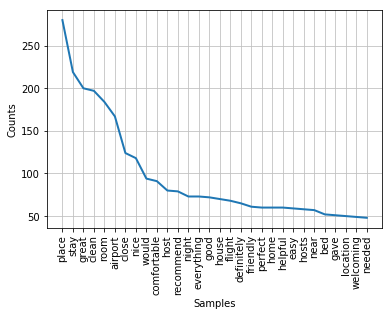

In [242]:
# first listing most freq words

import matplotlib.pyplot as plt
msgFD.plot(30,cumulative=False)
plt.show()

In [417]:
msgFD6 = nltk.FreqDist(s_lower_stop_pun)
top_words6 = msgFD6.most_common(30)
top_words6

[('place', 200),
 ('clean', 190),
 ('stay', 160),
 ('host', 148),
 ('great', 127),
 ('room', 124),
 ('nice', 108),
 ('jfk', 104),
 ('airport', 85),
 ('good', 66),
 ('recommend', 64),
 ('close', 62),
 ('comfortable', 58),
 ('helpful', 55),
 ('would', 54),
 ('definitely', 45),
 ('friendly', 43),
 ('location', 43),
 ('family', 42),
 ('everything', 41),
 ('highly', 41),
 ('night', 41),
 ('really', 40),
 ('bus', 39),
 ('perfect', 39),
 ('house', 38),
 ('time', 37),
 ('easy', 37),
 ('singh', 34),
 ('hosts', 33)]

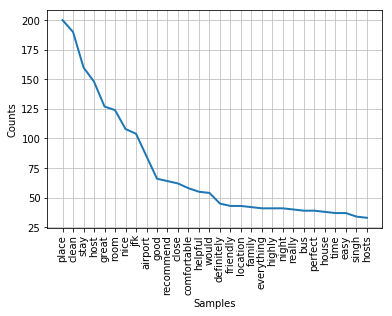

In [418]:
# first listing most freq words

import matplotlib.pyplot as plt
msgFD6.plot(30,cumulative=False)
plt.show()

In [97]:
# after checking the top 20 word for first listing, update the stop_words
nltk_stopwords.update(["joe", "us", "get", "also", "city","de","nyc","jfk","dona","'s"])

In [98]:
# remove stopwords
fst_lower_stop2 = [x for x in fst_lower_stop_pun if not x in nltk_stopwords]
print(len(fst_lower_stop2))
print(fst_lower_stop2[:5])


10619
['place', 'absolutely', 'fantastic', 'house', 'minutes']


In [99]:
# word frequency for the first listing
msgFD = nltk.FreqDist(fst_lower_stop2)
top_words = msgFD.most_common(30)
top_words

[('place', 280),
 ('stay', 219),
 ('great', 200),
 ('clean', 197),
 ('room', 184),
 ('airport', 167),
 ('close', 124),
 ('sandi', 120),
 ('nice', 118),
 ('would', 94),
 ('comfortable', 91),
 ('really', 87),
 ('host', 80),
 ('recommend', 79),
 ('night', 73),
 ('everything', 73),
 ('good', 72),
 ('house', 70),
 ('flight', 68),
 ('definitely', 65),
 ('friendly', 61),
 ('perfect', 60),
 ('home', 60),
 ('helpful', 60),
 ('easy', 59),
 ('hosts', 58),
 ('near', 57),
 ('bed', 52),
 ('gave', 51),
 ('location', 50)]

In [244]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in fst_lower_stop_pun:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",len(fst_lower_stop_pun))
print("Stemmed Sentence:",len(stemmed_words))

Filtered Sentence: 10243
Stemmed Sentence: 10243


In [103]:
type(fst_lower_stop2)
type(stemmed_words)

list

In [245]:
nltk.pos_tag(fst_lower_stop_pun)


[('place', 'NN'),
 ('absolutely', 'RB'),
 ('fantastic', 'JJ'),
 ('house', 'NN'),
 ('minutes', 'NNS'),
 ('away', 'RP'),
 ('airport', 'NN'),
 ('prefect', 'VBP'),
 ('early', 'JJ'),
 ('flight', 'NN'),
 ('room', 'NN'),
 ('clean', 'NN'),
 ('extremely', 'RB'),
 ('comfortable', 'JJ'),
 ('welcoming', 'VBG'),
 ('waited', 'JJ'),
 ('arrive', 'JJ'),
 ('late', 'JJ'),
 ('airport', 'NN'),
 ('give', 'VBP'),
 ('quick', 'JJ'),
 ('tour', 'NN'),
 ('floor', 'NN'),
 ('showed', 'VBD'),
 ('tea', 'IN'),
 ('wished', 'JJ'),
 ('good', 'JJ'),
 ('night', 'NN'),
 ('would', 'MD'),
 ('happy', 'VB'),
 ('stay', 'VB'),
 ('place', 'IN'),
 ('next', 'JJ'),
 ('time', 'NN'),
 ('stranded', 'VBD'),
 ('close', 'JJ'),
 ('jfkairport', 'NN'),
 ('friendly', 'RB'),
 ('host', 'VBD'),
 ('everything', 'NN'),
 ('perfect', 'NN'),
 ('lost', 'VBD'),
 ('way', 'NN'),
 ('home', 'NN'),
 ('sister', 'NN'),
 ('picked', 'VBD'),
 ('car', 'NN'),
 ('wife', 'NN'),
 ('daughter', 'NN'),
 ('sandy', 'JJ'),
 ('special', 'JJ'),
 ('host', 'NN'),
 ('team', 'NN'

In [247]:
# let's look at bi-gram
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# convert original list into a list of bi-grams tokens
textbigrams = list(nltk.bigrams(fst_lower))
print(len(textbigrams))
finder = BigramCollocationFinder.from_words(fst_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
clean_scored2 = finder.score_ngrams(bigram_measures.raw_freq)
print(len(clean_scored2))
clean_scored2[:50]

24649
2401


[(('great', 'place'), 0.0015821501014198784),
 (('would', 'definitely'), 0.0013387423935091278),
 (('definitely', 'recommend'), 0.0009330628803245436),
 (('highly', 'recommend'), 0.0008924949290060852),
 (('one', 'night'), 0.0008519269776876267),
 (('definitely', 'stay'), 0.0007302231237322516),
 (('new', 'york'), 0.0006490872210953347),
 (('overnight', 'stay'), 0.0005273833671399595),
 (('stay', 'near'), 0.0005273833671399595),
 (('would', 'recommend'), 0.0005273833671399595),
 (('come', 'back'), 0.000486815415821501),
 (('great', 'host'), 0.000486815415821501),
 (('would', 'stay'), 0.000486815415821501),
 (('early', 'flight'), 0.0004462474645030426),
 (('clean', 'place'), 0.00040567951318458417),
 (('comfortable', 'bed'), 0.00040567951318458417),
 (('great', 'stay'), 0.00040567951318458417),
 (('recommend', 'staying'), 0.00040567951318458417),
 (('clean', 'room'), 0.0003651115618661258),
 (('comfortable', 'room'), 0.0003651115618661258),
 (('felt', 'like'), 0.0003651115618661258),
 (

In [420]:

# let's look at bi-gram
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

# convert original list into a list of bi-grams tokens
textbigrams6 = list(nltk.bigrams(s_lower))
print(len(textbigrams))
finder = BigramCollocationFinder.from_words(s_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords)
clean_scored6 = finder.score_ngrams(bigram_measures.raw_freq)
print(len(clean_scored6))
clean_scored6[:60]

839861
1727


[(('highly', 'recommend'), 0.0017736320042041648),
 (('great', 'place'), 0.0014451816330552454),
 (('would', 'definitely'), 0.0013138014845956777),
 (('jfk', 'airport'), 0.0011824213361361097),
 (('clean', 'place'), 0.001051041187676542),
 (('great', 'host'), 0.001051041187676542),
 (('new', 'york'), 0.001051041187676542),
 (('definitely', 'recommend'), 0.0009853511134467583),
 (('definitely', 'stay'), 0.0009196610392169743),
 (('bus', 'stop'), 0.0007225908165276227),
 (('highly', 'recommended'), 0.0007225908165276227),
 (('nice', 'host'), 0.0007225908165276227),
 (('made', 'sure'), 0.0006569007422978388),
 (('super', 'clean'), 0.0006569007422978388),
 (('really', 'nice'), 0.0005912106680680549),
 (('wonderful', 'host'), 0.0005912106680680549),
 (('clean', 'room'), 0.000525520593838271),
 (('come', 'back'), 0.000525520593838271),
 (('great', 'location'), 0.000525520593838271),
 (('public', 'transport'), 0.000525520593838271),
 (('public', 'transportation'), 0.000525520593838271),
 (('w

In [316]:
rev_h_NNA = rev_h[rev_h['comments'].notnull()]
rev_l_NNA = rev_l[rev_l['comments'].notnull()]
rev_m_NNA = rev_m[rev_m['comments'].notnull()]
rev_l2_NNA = rev_l2[rev_l2['comments'].notnull()]


In [317]:
print(len(rev_h[rev_h['comments'].notnull()]))
print(len(rev_l[rev_l['comments'].notnull()]))
print(len(rev_l2[rev_l2['comments'].notnull()]))
len(rev_m[rev_m['comments'].notnull()])

5747
8722
1595


6210

In [318]:
print(rev_h['comments'].isnull().sum())
print(rev_l['comments'].isnull().sum())
print(rev_m['comments'].isnull().sum())

9
23
9


In [319]:
rev_h_text = " ".join(com for com in rev_h_NNA['comments'])
rev_l_text = " ".join(com for com in rev_l_NNA['comments'])
rev_m_text = " ".join(com for com in rev_m_NNA['comments'])
rev_l2_text = " ".join(com for com in rev_l2_NNA['comments'])
rev_l2_text

'The host canceled this reservation 13 days before arrival. This is an automated posting. The location and the communication with the host were great the only issue I encounter it was the sleeping situation eventhough the host did help me with everything Jack is a great host.  Makes sure you have everything you need from check-in to check-out.  His apartment is in a great midtown location.  I would stay there again. Ok yes. I really like the location of  house and it’s very convenient. And the house is very clean. He is a very nice host. Almost everything is good. The only thing little bother me is just the noise from outside like car or bird something. Anyway Five Stars hahahah I had a nice trip in this place Dirty, unclean, and very outdated/rundown. Apart from location  there is NOTHING nice about this place. I forgot to mention in my review its 4 flights up stairs up no elevator. Thus not suitable for disabled or people who struggle to walk up stairs (esp with luggage).\n\nThis pla

In [198]:
# split based on words only
import re
#t1_com_all_l = re.split(r'\W+', t1_com_all.lower())
rev_l2_text_all = re.split(r'\W+', rev_l2_text.lower())
rev_h_text_all = re.split(r'\W+', rev_h_text.lower())


# this creates a list of words only, no punctuation
#rev_l2_text_all

In [204]:
rev_l2_text

'The host canceled this reservation 13 days before arrival. This is an automated posting. The location and the communication with the host were great the only issue I encounter it was the sleeping situation eventhough the host did help me with everything Jack is a great host.  Makes sure you have everything you need from check-in to check-out.  His apartment is in a great midtown location.  I would stay there again. Ok yes. I really like the location of  house and it’s very convenient. And the house is very clean. He is a very nice host. Almost everything is good. The only thing little bother me is just the noise from outside like car or bird something. Anyway Five Stars hahahah I had a nice trip in this place Dirty, unclean, and very outdated/rundown. Apart from location  there is NOTHING nice about this place. I forgot to mention in my review its 4 flights up stairs up no elevator. Thus not suitable for disabled or people who struggle to walk up stairs (esp with luggage).\n\nThis pla

In [344]:
import re
from nltk.util import ngrams
#rev_l2_text = " ".join(com for com in rev_l2_NNA['comments'])

rev_l2_text = rev_l2_text.lower()
rev_l2_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', rev_l2_text)
rev_l2_text_all = re.split(r'\W+', rev_l2_text.lower())
filtered_sentence_l2 = [w for w in rev_l2_text_all if not w in stop_words] 
rev_l2_clean_text =(" ").join(filtered_sentence_l2)

tokens = [token for token in rev_l2_clean_text.split(" ") if token != ""]
output = list(ngrams(tokens, 4))
output


[('canceled', 'reservation', '13', 'days'),
 ('reservation', '13', 'days', 'arrival'),
 ('13', 'days', 'arrival', 'automated'),
 ('days', 'arrival', 'automated', 'posting'),
 ('arrival', 'automated', 'posting', 'communication'),
 ('automated', 'posting', 'communication', 'great'),
 ('posting', 'communication', 'great', 'issue'),
 ('communication', 'great', 'issue', 'encounter'),
 ('great', 'issue', 'encounter', 'sleeping'),
 ('issue', 'encounter', 'sleeping', 'situation'),
 ('encounter', 'sleeping', 'situation', 'eventhough'),
 ('sleeping', 'situation', 'eventhough', 'help'),
 ('situation', 'eventhough', 'help', 'everything'),
 ('eventhough', 'help', 'everything', 'jack'),
 ('help', 'everything', 'jack', 'great'),
 ('everything', 'jack', 'great', 'makes'),
 ('jack', 'great', 'makes', 'sure'),
 ('great', 'makes', 'sure', 'everything'),
 ('makes', 'sure', 'everything', 'need'),
 ('sure', 'everything', 'need', 'check'),
 ('everything', 'need', 'check', 'check'),
 ('need', 'check', 'check'

In [336]:
rev_l2_lis = rev_l2_NNA['comments'].tolist()
rev_l2_lis

['The host canceled this reservation 13 days before arrival. This is an automated posting.',
 'The location and the communication with the host were great the only issue I encounter it was the sleeping situation eventhough the host did help me with everything',
 'Jack is a great host.  Makes sure you have everything you need from check-in to check-out.  His apartment is in a great midtown location.  I would stay there again.',
 'Ok yes. I really like the location of  house and it’s very convenient. And the house is very clean. He is a very nice host. Almost everything is good. The only thing little bother me is just the noise from outside like car or bird something. Anyway Five Stars hahahah I had a nice trip in this place',
 'Dirty, unclean, and very outdated/rundown. Apart from location  there is NOTHING nice about this place. I forgot to mention in my review its 4 flights up stairs up no elevator. Thus not suitable for disabled or people who struggle to walk up stairs (esp with lugg

In [340]:
nltk_stopwords2 = set(nltk.corpus.stopwords.words('english'))
nltk_stopwords2.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","se","le","'s","la","suzy"])

In [342]:
# let's look at bi-gram
from nltk.collocations import *
trigram_measures = nltk.collocations.TrigramAssocMeasures()

bot_lower = [tok.lower() for i in rev_l2_lis for tok in nltk.word_tokenize(i)]

# convert original list into a list of bi-grams tokens
bot_trigrams = list(nltk.trigrams(bot_lower))
print(len(bot_trigrams))
finder = TrigramCollocationFinder.from_words(bot_lower)

# remove punctuations and other special characters
finder.apply_word_filter(alpha_filter)

# remove stopwords
finder.apply_word_filter(lambda w: w in nltk_stopwords2)
bot_trigrams = finder.score_ngrams(trigram_measures.raw_freq)
print(len(bot_trigrams))
bot_trigrams

76719
5078


[(('would', 'definitely', 'stay'), 0.0003258560237744555),
 (('within', 'walking', 'distance'), 0.00018247937331369507),
 (('would', 'definitely', 'recommend'), 0.00018247937331369507),
 (('empire', 'state', 'building'), 0.00016944513236271684),
 (('ca', "n't", 'beat'), 9.123968665684754e-05),
 (('near', 'times', 'square'), 9.123968665684754e-05),
 (('très', 'bien', 'situé'), 7.820544570586932e-05),
 (('es', 'muy', 'buena'), 6.51712047548911e-05),
 (('spend', 'much', 'time'), 6.51712047548911e-05),
 (('upper', 'east', 'side'), 6.51712047548911e-05),
 (('would', "n't", 'recommend'), 6.51712047548911e-05),
 (('would', 'recommend', 'staying'), 6.51712047548911e-05),
 (('bon', 'rapport', 'qualité'), 5.2136963803912876e-05),
 (('definitely', 'recommend', 'staying'), 5.2136963803912876e-05),
 (('en', 'las', 'fotos'), 5.2136963803912876e-05),
 (('es', 'tal', 'cual'), 5.2136963803912876e-05),
 (('great', 'location', 'right'), 5.2136963803912876e-05),
 (('playing', 'video', 'games'), 5.21369638

In [421]:
NN_list_text =(" ").join(NN_list)

In [427]:
stop_words.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","queen","check","clean"])

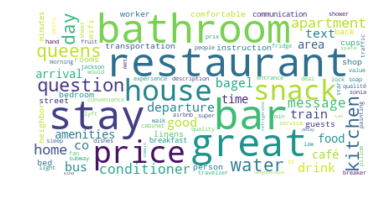

In [428]:
NN_list_text =(" ").join(NN_list)
type(NN_list)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
NN_wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").\
generate(NN_list_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(NN_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


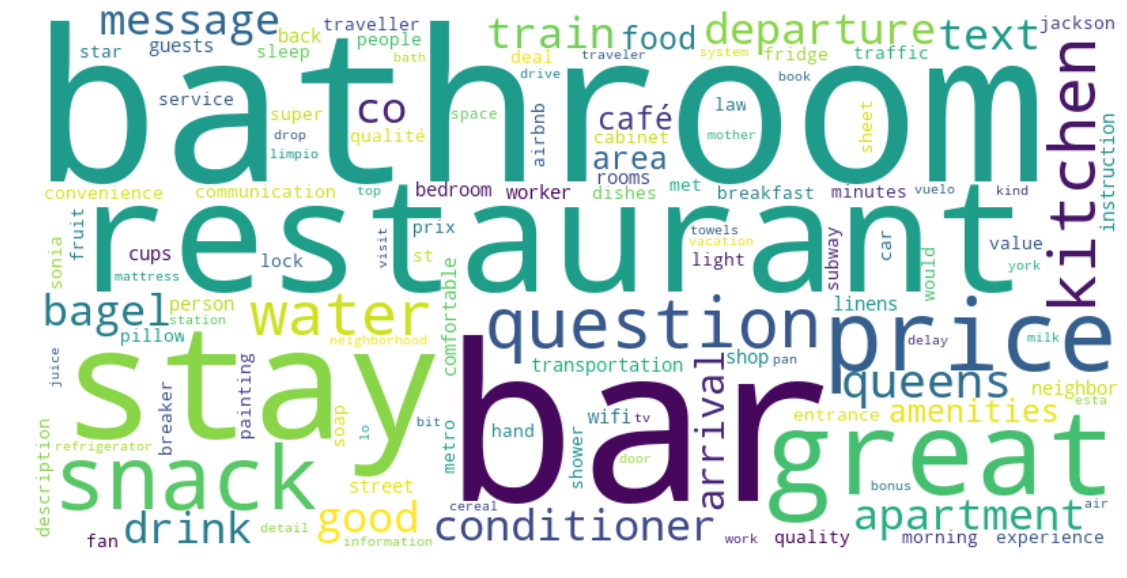

In [451]:
NN_wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, max_words=120, background_color="white").generate(NN_list_text)
plt.figure( figsize=(20,10) )
plt.imshow(NN_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [452]:
NN_wordcloud.to_file("NN_wordcloud.png")


In [307]:
stop_words.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","night","one","self","room","una",
                  "ny","guest","nights","taxi","tea","60min","hotel","pre",
                  "coffee","host","uber","minute","hour","touch","cab","place",
                  "airport","location","middle","stop","able","sol","brooklyn",
                  "un","due","mr"])

In [441]:
stop_words.update(["joe", "us", "get", "also", "city","de","also","gurpreet",
                  "qualite","etc","trip","travel","lga","non","10pm","floor","lyft",
                  "home","walk","like","thank","week","min","10min","bed","bus","time",
                  "day","house","line","multi"])

In [429]:
AJ_list_text =(" ").join(AJ_list)

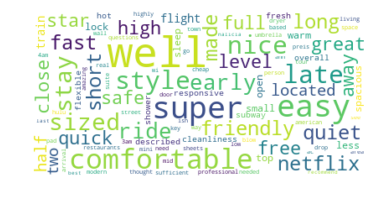

In [442]:
type(AJ_list)
# top 200 active listing noun word cloud
# lower max_font_size, change the maximum number of word and lighten the background:
AJ_wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").\
generate(AJ_list_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(AJ_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

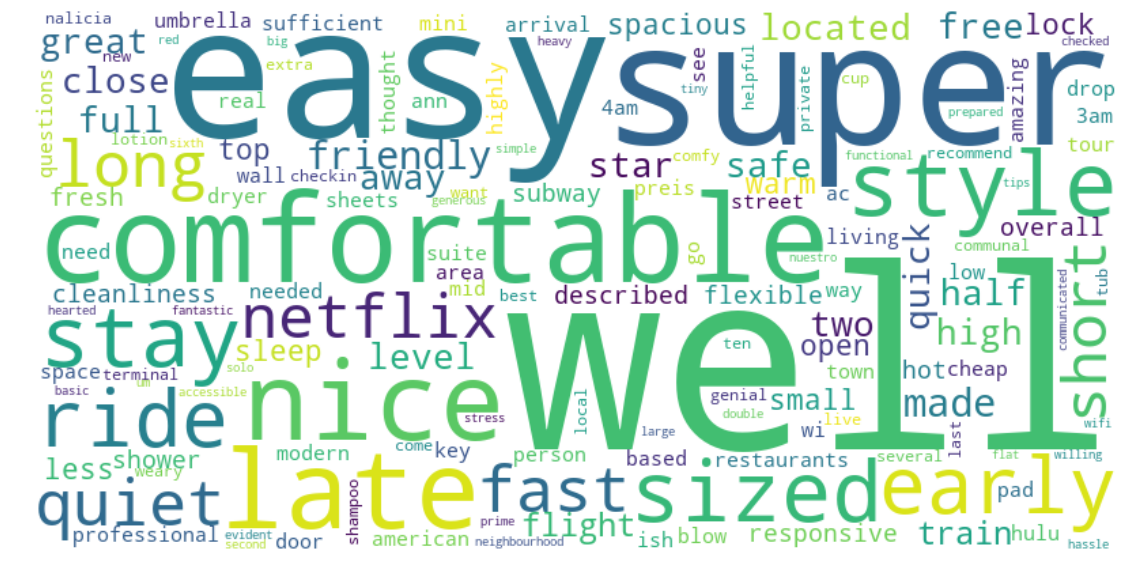

In [448]:
AJ_wordcloud = WordCloud(width=800, height=400, stopwords=stop_words, max_words=150, background_color="white").generate(AJ_list_text)
plt.figure( figsize=(20,10) )
plt.imshow(AJ_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [449]:
AJ_wordcloud.to_file("AJ_wordcloud.png")


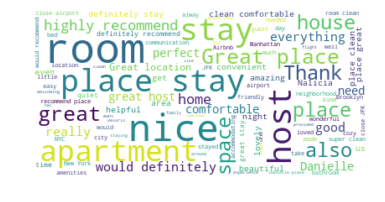

In [142]:
# lower max_font_size, change the maximum number of word and lighten the background:
t1_wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").\
generate(rev_h_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(t1_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

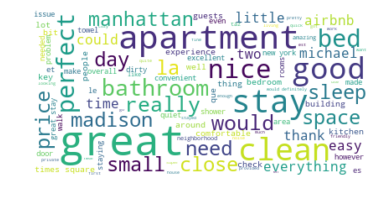

In [343]:
# lower max_font_size, change the maximum number of word and lighten the background:
t1_wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").\
generate(rev_l2_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(t1_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

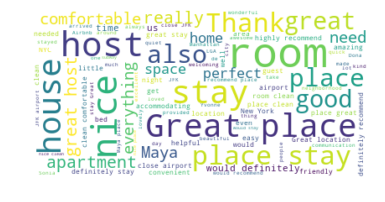

In [99]:
# lower max_font_size, change the maximum number of word and lighten the background:
t1_wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").\
generate(rev_m_text)
#stopwords:set of strings or None
#The words that will be eliminated. If None, the build-in STOPWORDS list will be used. Ignored if using generate_from_frequencies.

plt.figure()
plt.imshow(t1_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [109]:
def remove_stopwords (l):
    word_tokens = word_tokenize(l)
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence

In [ ]:
t1_rev_f = list(map(remove_stopwords, t1_review_NNA))
t1_rev_f

In [100]:
#t1_review_NNA.apply(lambda x: [item for item in x if item not in stop_words])

In [101]:
#df['Title'] = df['Title'].apply(lambda x: [item for item in x if item not in stop])
#df['Body'] = df['Body'].apply(lambda x: [item for item in x if item not in stop])

In [199]:
stop_words = set(stopwords.words('english'))   

#word_tokens = word_tokenize(t1_com_all)
filtered_sentence = [w for w in rev_l2_text_all if not w in stop_words] 
print(len(filtered_sentence))

#t1_review['comments'] = 
#t1_review['comments'].apply(lambda x: [item for item in x if item not in stop_words])

#t1_review['b_com'] = t1_review['comments'].str.lower().str.split()
#t1_review['b_com'] = t1_review['b_com'].apply(lambda x: [item for item in x if item not in stop_words])
#t1_review.dtypes
# t1_review_NNA --> this is a dataframe lol
#t1_review
#rev_h_text

filtered_sentence_h = [w for w in rev_h_text_all if not w in stop_words] 
print(len(filtered_sentence_h))

37700
108254


In [185]:
#stop_words
filtered_sentence

['host',
 'canceled',
 'reservation',
 '13',
 'days',
 'arrival',
 'automated',
 'posting',
 'location',
 'communication',
 'host',
 'great',
 'issue',
 'encounter',
 'sleeping',
 'situation',
 'eventhough',
 'host',
 'help',
 'everything',
 'jack',
 'great',
 'host',
 'makes',
 'sure',
 'everything',
 'need',
 'check',
 'check',
 'apartment',
 'great',
 'midtown',
 'location',
 'would',
 'stay',
 'ok',
 'yes',
 'really',
 'like',
 'location',
 'house',
 'convenient',
 'house',
 'clean',
 'nice',
 'host',
 'almost',
 'everything',
 'good',
 'thing',
 'little',
 'bother',
 'noise',
 'outside',
 'like',
 'car',
 'bird',
 'something',
 'anyway',
 'five',
 'stars',
 'hahahah',
 'nice',
 'trip',
 'place',
 'dirty',
 'unclean',
 'outdated',
 'rundown',
 'apart',
 'location',
 'nothing',
 'nice',
 'place',
 'forgot',
 'mention',
 'review',
 '4',
 'flights',
 'stairs',
 'elevator',
 'thus',
 'suitable',
 'disabled',
 'people',
 'struggle',
 'walk',
 'stairs',
 'esp',
 'luggage',
 'place',
 'de

In [186]:
type(filtered_sentence)

list

In [189]:
# after checking the top 20 word for first listing, update the stop_words
stop_words.update(["joe", "us", "get", "also", "city","de","also",""])


In [190]:
# input the list of words with only words from the first listing

from collections import Counter
Counter(rev_l2_text).most_common(30)    # this calculate words frequencies from a list of words
Counter(filtered_sentence).most_common(30) # this calculate word frequencies from a list of words without stop_words

# all convert into lower cases

[('place', 726),
 ('great', 686),
 ('location', 568),
 ('stay', 510),
 ('room', 453),
 ('apartment', 377),
 ('clean', 374),
 ('good', 365),
 ('host', 266),
 ('would', 257),
 ('nice', 232),
 ('check', 214),
 ('close', 191),
 ('de', 187),
 ('easy', 182),
 ('la', 181),
 ('night', 179),
 ('time', 176),
 ('get', 176),
 ('bed', 176),
 ('perfect', 167),
 ('everything', 162),
 ('really', 158),
 ('also', 149),
 ('us', 146),
 ('one', 145),
 ('subway', 142),
 ('bathroom', 140),
 ('recommend', 139),
 ('price', 128)]

In [200]:
filtered_sentence_h

['nice',
 'place',
 'lots',
 'privacy',
 'great',
 'space',
 'cute',
 'clean',
 'incredibly',
 'convenient',
 'airport',
 'thankful',
 'neighborhood',
 'quiet',
 'well',
 'barely',
 'slept',
 'past',
 'two',
 'days',
 'due',
 'continuous',
 'trains',
 'flights',
 'definitely',
 'plan',
 'stay',
 'husband',
 'stayed',
 'nalicia',
 'apartment',
 'two',
 'days',
 'extended',
 'layover',
 'jfk',
 'happy',
 'nalicia',
 'communication',
 'preparation',
 'kind',
 'easily',
 'accommodate',
 'last',
 'minute',
 'change',
 'plans',
 'long',
 'delay',
 'journey',
 'apartment',
 'perfectly',
 'furnished',
 'everything',
 'could',
 'possibly',
 'need',
 'nice',
 'stay',
 'felt',
 'right',
 'home',
 'apartment',
 'minutes',
 'jfk',
 'airport',
 'made',
 'getting',
 'apartment',
 'breeze',
 'stocked',
 'refrigerator',
 'nice',
 'towels',
 'toiletries',
 'bookshelf',
 'filled',
 'great',
 'selections',
 'place',
 'perfect',
 'highly',
 'recommend',
 'staying',
 'nalicia',
 'definitely',
 'book',
 'pla

In [191]:
stop_words.update(["joe", "us", "get", "also", "city","jj", "room", "place","stay","really","de","apartment"])

filtered_sentence_2 = [w for w in rev_l2_text_all if not w in stop_words] 
Counter(filtered_sentence_2).most_common(30)

[('great', 686),
 ('location', 568),
 ('clean', 374),
 ('good', 365),
 ('host', 266),
 ('would', 257),
 ('nice', 232),
 ('check', 214),
 ('close', 191),
 ('easy', 182),
 ('la', 181),
 ('night', 179),
 ('time', 176),
 ('bed', 176),
 ('perfect', 167),
 ('everything', 162),
 ('one', 145),
 ('subway', 142),
 ('bathroom', 140),
 ('recommend', 139),
 ('price', 128),
 ('comfortable', 124),
 ('definitely', 115),
 ('small', 112),
 ('square', 110),
 ('like', 107),
 ('space', 106),
 ('madison', 104),
 ('two', 99),
 ('manhattan', 98)]

In [192]:
rev_l2_clean_text =(" ").join(filtered_sentence_2)
type(rev_l2_clean_text)

str

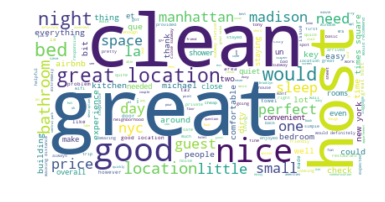

In [193]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", mode="RGBA").generate(rev_l2_clean_text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [201]:
stop_words.update(["joe", "us", "get", "also", "city","jj", "room", "place","stay","really","de","apartment"])

#filtered_sentence_2 = [w for w in rev_l2_text_all if not w in stop_words] 
Counter(filtered_sentence_h).most_common(30)

[('place', 3407),
 ('great', 2595),
 ('stay', 2448),
 ('clean', 2328),
 ('room', 1402),
 ('nice', 1163),
 ('comfortable', 1119),
 ('host', 1109),
 ('would', 1059),
 ('recommend', 952),
 ('definitely', 820),
 ('close', 800),
 ('location', 787),
 ('everything', 744),
 ('airport', 743),
 ('jfk', 721),
 ('perfect', 719),
 ('home', 706),
 ('super', 704),
 ('easy', 680),
 ('danielle', 678),
 ('really', 656),
 ('good', 563),
 ('bed', 560),
 ('check', 554),
 ('apartment', 536),
 ('us', 529),
 ('highly', 503),
 ('quiet', 490),
 ('time', 488)]

In [202]:
#filtered_sentence_h
rev_h_clean_text =(" ").join(filtered_sentence_h)
type(rev_h_clean_text)

str

In [203]:
import re
from nltk.util import ngrams

rev_h_clean_text = rev_h_clean_text.lower()
rev_h_clean_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', rev_h_clean_text)
tokens = [token for token in rev_h_clean_text.split(" ") if token != ""]
output = list(ngrams(tokens, 5))
output

[('nice', 'place', 'lots', 'privacy', 'great'),
 ('place', 'lots', 'privacy', 'great', 'space'),
 ('lots', 'privacy', 'great', 'space', 'cute'),
 ('privacy', 'great', 'space', 'cute', 'clean'),
 ('great', 'space', 'cute', 'clean', 'incredibly'),
 ('space', 'cute', 'clean', 'incredibly', 'convenient'),
 ('cute', 'clean', 'incredibly', 'convenient', 'airport'),
 ('clean', 'incredibly', 'convenient', 'airport', 'thankful'),
 ('incredibly', 'convenient', 'airport', 'thankful', 'neighborhood'),
 ('convenient', 'airport', 'thankful', 'neighborhood', 'quiet'),
 ('airport', 'thankful', 'neighborhood', 'quiet', 'well'),
 ('thankful', 'neighborhood', 'quiet', 'well', 'barely'),
 ('neighborhood', 'quiet', 'well', 'barely', 'slept'),
 ('quiet', 'well', 'barely', 'slept', 'past'),
 ('well', 'barely', 'slept', 'past', 'two'),
 ('barely', 'slept', 'past', 'two', 'days'),
 ('slept', 'past', 'two', 'days', 'due'),
 ('past', 'two', 'days', 'due', 'continuous'),
 ('two', 'days', 'due', 'continuous', 'tra

In [197]:
import re
from nltk.util import ngrams

rev_l2_clean_text = rev_l2_clean_text.lower()
rev_l2_clean_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', rev_l2_clean_text)
tokens = [token for token in rev_l2_clean_text.split(" ") if token != ""]
output = list(ngrams(tokens, 5))
output

[('host', 'canceled', 'reservation', '13', 'days'),
 ('canceled', 'reservation', '13', 'days', 'arrival'),
 ('reservation', '13', 'days', 'arrival', 'automated'),
 ('13', 'days', 'arrival', 'automated', 'posting'),
 ('days', 'arrival', 'automated', 'posting', 'location'),
 ('arrival', 'automated', 'posting', 'location', 'communication'),
 ('automated', 'posting', 'location', 'communication', 'host'),
 ('posting', 'location', 'communication', 'host', 'great'),
 ('location', 'communication', 'host', 'great', 'issue'),
 ('communication', 'host', 'great', 'issue', 'encounter'),
 ('host', 'great', 'issue', 'encounter', 'sleeping'),
 ('great', 'issue', 'encounter', 'sleeping', 'situation'),
 ('issue', 'encounter', 'sleeping', 'situation', 'eventhough'),
 ('encounter', 'sleeping', 'situation', 'eventhough', 'host'),
 ('sleeping', 'situation', 'eventhough', 'host', 'help'),
 ('situation', 'eventhough', 'host', 'help', 'everything'),
 ('eventhough', 'host', 'help', 'everything', 'jack'),
 ('hos

In [291]:
rev_1 = top_by_avg_rev.sort_values('review_scores_rating', ascending=False).head(20)
rev_1_id = rev_1['id'].tolist()
# rev_1['number_of_reviews'].sum() ==> yay it matches!! 3495 reviews

3495

In [290]:
top_20_review = air_review.loc[air_review['listing_id'].isin(rev_1_id)]
#air_review['id'][rev_1_id]
len(top_20_review)

3495

In [300]:
top_20_review_NNA = top_20_review[top_20_review['comments'].notnull()]
len(top_20_review_NNA)


3488

In [1]:
top_review_str = " ".join(com for com in top_20_review_NNA['comments'])
type(top_review_str)
#top_review_str # this is a big string

NameError: name 'top_20_review_NNA' is not defined

In [302]:
top_rev_word_list = re.split(r'\W+', top_review_str.lower())
top_rev_word_list1 = [w for w in top_rev_word_list if not w in stop_words] 
Counter(top_rev_word_list1).most_common(30)


[('clean', 1440),
 ('great', 1376),
 ('jfk', 861),
 ('nice', 726),
 ('airport', 702),
 ('comfortable', 694),
 ('close', 589),
 ('host', 568),
 ('would', 562),
 ('recommend', 540),
 ('danielle', 508),
 ('perfect', 480),
 ('definitely', 420),
 ('everything', 415),
 ('easy', 413),
 ('home', 401),
 ('good', 390),
 ('location', 372),
 ('super', 367),
 ('bed', 353),
 ('check', 349),
 ('night', 347),
 ('nalicia', 316),
 ('flight', 301),
 ('bathroom', 297),
 ('quiet', 296),
 ('highly', 285),
 ('house', 279),
 ('dona', 277),
 ('time', 261)]

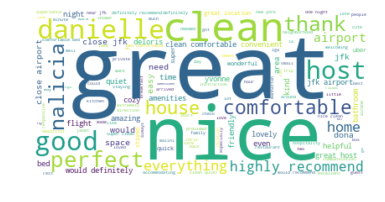

In [304]:
top_rev_clean =(" ").join(top_rev_word_list1)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", mode="RGBA").generate(top_rev_clean)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1]:
import requests
url = 'https://gateway.watsonplatform.net/tone-analyzer/api'

In [2]:
def analyze_tone(tweet):
    """
    this function takes a tweet and returns the JSON result from IBM's Tone Analyzer Application
    """
    
    params = (
        ('version', '2017-09-21'),
        ('text', tweet),)

    response = requests.get(
        url,
        params=params,
        auth=('apikey', 'gASCAkBsKhEXsnWYNjAqm3GawmuPbgPz42o20-dJcyI5'))
    
    return response


In [66]:
#analyze_tone(
sample_comment = rev_l2['comments'][5975]
sample_comment

'Ok yes. I really like the location of  house and it’s very convenient. And the house is very clean. He is a very nice host. Almost everything is good. The only thing little bother me is just the noise from outside like car or bird something. Anyway Five Stars hahahah I had a nice trip in this place'

In [5]:
sample_comment = 'Ok yes. I really like the location of  house and it’s very convenient. And the house is very clean. He is a very nice host. Almost everything is good. The only thing little bother me is just the noise from outside like car or bird something. Anyway Five Stars hahahah I had a nice trip in this place'


In [6]:
i = analyze_tone(sample_comment)
i.json()

{'code': 404, 'sub_code': 'C00010', 'error': 'Not Found'}

In [ ]:
tweet_sentiment = []

for tweet in tweet_text:
    sentiment = analyze_tone(tweet)
    if sentiment.status_code != 200:
        break
    tweet_sentiment.append(sentiment)

In [471]:

tweet_text = rev_l2['comments'].tolist()
type(bot_list)

list

In [476]:
tweet_sentiment = []

for tweet in tweet_text:
    sentiment = analyze_tone(tweet)
    if sentiment.status_code != 200:
        break
    tweet_sentiment.append(sentiment)

NameError: name 'requests' is not defined

In [477]:
tone_df = pd.DataFrame()

for i in range(len(tweet_sentiment)):
    # fetch the json, then the document tones
    sent_json = tweet_sentiment[i].json()
    doc_tones = sent_json['document_tone']['tones']

    # convert the dictionary to a list of just the dict values
    doc_tones_list = [list(tone.values()) for tone in doc_tones]
    # sort the list by the score (highest to lowest)
    doc_tones_list.sort(reverse=True)
    # if the tweet was analyzed, then append the tweet text to the front of the most dominant tone by score
    # else add the text followed by three null values
    try:
        predominant_tones = [str(i), tweet_text[i]] +doc_tones_list[0]
        df = pd.DataFrame([predominant_tones], columns=['tweet_number','tweet','score','tone_id','tone_name'])
    except:
         df = pd.DataFrame([[str(i), tweet_text[i]]+[np.NaN, np.NaN, np.NaN]], columns=['tweet_number','tweet','score','tone_id','tone_name'])

    # append the 1 row dataframe to the tone_df dataframe initialized above
    tone_df = tone_df.append(df)

tone_df = tone_df.reset_index(drop=True)


In [478]:
tone_df.head(10)

""
